# <a id='toc1_'></a>[Optimisation de Geometrie](#toc0_)

 **FRANKLIN MARSHALL FENGA**, franklin.fenga@facsciences-uy1.cm
 * Department of Physics, Faculty of Science, University of Yaoundé I

December 2024

#### Le but de cet exercice est de :

* Identifier et sélectionner une molécule organique optoélectronique : Apprendre à choisir une molécule organique optoélectronique à partir de bases de données ou de littérature scientifique, en tenant compte des critères pertinents pour les applications optoélectroniques.

* Faire une Optimisation de la géométrie moléculaire : Utiliser les logiciels RDkit, Crest et xTB pour effectuer l'optimisation de la géométrie de la molécule sélectionnée, en explorant les différentes méthodes et algorithmes d'optimisation disponibles.

* Effectuer des calculs Hartree-Fock (HF) et DFT (Théorie de la Fonctionnelle de Densité) sur la molécule optimisée, en comprenant le rôle du choix de la base et de la fonctionnelle pour chaque méthode de calcul.

* Apprendre à interpréter et analyser les fichiers de sortie Log générés après optimisation avec xTB et Crest, en mettant l'accent sur la compréhension des résultats relatifs à l'énergie, la géométrie et les propriétés électroniques de la molécule.

* Apprendre à choisir judicieusement la fonctionnelle et la base appropriées en fonction de l'objet d'étude et des résultats souhaités, en analysant l'impact de ces choix sur la précision des calculs et les propriétés de la molécule.

### choix d'une molécule organique optoélectronique

Notre molecule choisie est le **Cyanobenzène (benzonitrile)** de formule brute C7H5N


In [1]:
from IPython import get_ipython
import time

# Variable globale pour enregistrer le temps de début
start_time = None

# Fonction appelée avant l'exécution de chaque cellule
def pre_execute_hook():
    global start_time
    start_time = time.time()

# Fonction appelée après l'exécution de chaque cellule
def post_execute_hook():
    global start_time
    if start_time is not None:  # Vérification que start_time a été défini
        end_time = time.time()
        elapsed_time = end_time - start_time
        print(f"Temps d'exécution : {elapsed_time:.2f} secondes")
        start_time = None  # Réinitialisation de start_time
    else:
        print("Erreur : le temps de début n'a pas été défini.")

# Enregistrement des hooks dans Jupyter
ip = get_ipython()
ip.events.register('pre_execute', pre_execute_hook)
ip.events.register('post_execute', post_execute_hook)


Erreur : le temps de début n'a pas été défini.


## Optimisation de géométrie de la molécule


## Création du répertoire de sauvegarde des fichiers

In [2]:
from pathlib import Path  #Pour manipuler les chemins de fichiers de manière plus pratique

Temps d'exécution : 0.00 secondes


In [3]:
# # Définir le chemin du répertoire
data_dir = Path('./dataGeo_opt')  # Cette ligne crée un objet Path représentant le chemin du sous-répertoire 'dataGeo_opt' dans le répertoire courant (.)

# # Créer le répertoire, sans lever d'erreur si celui-ci existe déjà
data_dir.mkdir(exist_ok=True)

Temps d'exécution : 0.00 secondes


La ligne `data_dir.mkdir(exist_ok=True)` vérifie si le répertoire `dataGeo_opt` existe déjà. Si ce n'est pas le cas, elle crée ce répertoire.

La méthode `mkdir()` du module pathlib qui permet de créer un nouveau répertoire 

L'argument `exist_ok=True` indique que si le répertoire existe déjà, la méthode ne lève pas d'erreur et continue simplement.

## Structure géométrique initiale avec RDKit

In [4]:
#  Importons les modules et classes nécessaires

import rdkit
from rdkit import Chem #  permet de manipuler des structures chimiques
from rdkit.Chem import AllChem, Draw , MolFromSmiles 
from rdkit.Chem import MolFromSmiles # Cette fonction convertit une chaîne SMILES (Simplified Molecular Input Line Entry System)
#en un objet molécule RDKit 

rdkit.__version__

'2024.03.5'

Temps d'exécution : 0.18 secondes


### 2D

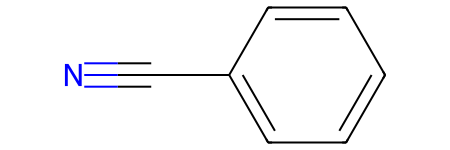

Temps d'exécution : 0.01 secondes


In [5]:
# Crée un objet molécule pour le Carbazole 

smile = 'C1=CC=C(C=C1)C#N' # Carbazole 
smi_key = 'Cyanobenzene'

# Représenter la molécule à partir du smile
mol_rdkitNop = Chem.MolFromSmiles(smile) # Cette ligne utilise la fonction MolFromSmiles du module Chem de RDKit pour créer une representation mol. (mol_rdkitNop) à partir SMILES
mol_rdkitNop # affiche une représentation de la molécule oxazole

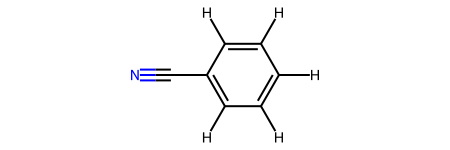

Temps d'exécution : 0.00 secondes


In [6]:
# Add explicit Hs
mol_rdkitNop = AllChem.AddHs(mol_rdkitNop) 
mol_rdkitNop

### Descripteurs

Caractérisent les différentes propriétés physico-chimiques de la molécule qui permettent d'évaluer la **complexité** d'une molécule en termes de sa structure chimique.

In [7]:
from rdkit.Chem import Descriptors
from rdkit.Contrib.SA_Score import sascorer

molwt = Descriptors.ExactMolWt(mol_rdkitNop)
logP = Descriptors.MolLogP(mol_rdkitNop) 
Sa_score = sascorer.calculateScore(mol_rdkitNop)
Polarity = Descriptors.TPSA(mol_rdkitNop) # Topological Polar Surface Area
Solubility = Descriptors.MolLogP(mol_rdkitNop)
hbd = Descriptors.NumHDonors(mol_rdkitNop)
hba = Descriptors.NumHAcceptors(mol_rdkitNop)

print(f'Some molecular properties are :\n Molecular weight:{molwt}, \n Solubility:{logP},  \n Sa score:{Sa_score}, \n polarity:{Polarity}, \n solubility:{logP}, \n hbd:{hbd}, \n hba:{hba}')  


Some molecular properties are :
 Molecular weight:103.04219916, 
 Solubility:1.5582799999999999,  
 Sa score:6.607011777980854, 
 polarity:23.79, 
 solubility:1.5582799999999999, 
 hbd:0, 
 hba:1
Temps d'exécution : 0.25 secondes


[16:11:14] DEPRECATION WARNING: please use MorganGenerator


##  Importance de chaque descripteur
  
  * **Polarity (TPSA) = 23.79 Å^2**

    - La polarité de la molécule TADF joue un rôle crucial dans le couplage spin-orbite, qui est le mécanisme clé du TADF.
    - Une polarité optimale permet de favoriser le croisement intersystème entre l'état singulet et l'état triplet, facilitant ainsi la conversion de l'état triplet    en état singulet émissif.
    - La polarité influence également les propriétés de transfert de charge dans la molécule, qui sont essentielles pour le TADF.
      
* Interprétation : Cette valeur de polarité est relativement élevée, indiquant une molécule assez polaire.
* Marge d'acceptation typique pour les molécules TADF : **20-60 Å^2**. La valeur de 26.03 Å^2 se situe donc dans la plage acceptable.

   * **Hbd (Nombre de donneurs de liaisons hydrogène) = 0**
 
 * Marge d'acceptation typique pour les molécules TADF : Hbd ≤ 2. La valeur de 0 est donc dans la plage acceptable.

    * **Hba (Nombre d'accepteurs de liaisons hydrogène) = 1**

* Marge d'acceptation typique pour les molécules TADF : Hba ≤ 6. La valeur de 1 est donc dans la plage acceptable.

    * **Solubilité (Solubility ou LogP) = 1.5582**
        Dans les dispositifs TADF, la solubilité des molécules est importante pour permettre une bonne mise en forme du matériau actif, par exemple par dépôt en solution.
       - Une bonne solubilité facilite aussi l'incorporation homogène de la molécule TADF dans la matrice hôte du dispositif.
       - Une solubilité appropriée permet d'optimiser les propriétés de transport de charges et d'émission de la couche active.
  

*    **Score de synthèse accessible (Sa score) = 6.607011777980854**
       - Le Sa score est une estimation de la facilité de synthèse d'une molécule.
      -  Pour les applications TADF, il est important de développer des molécules qui peuvent être synthétisées de manière relativement simple et peu coûteuse.
       - Un Sa score faible indique une meilleure accessibilité synthétique, ce qui est un critère important pour le développement de matériaux TADF à grande échelle.
 * Marge d'acceptation typique pour les molécules TADF : **Sa score ≤ 4,5**. La valeur de 4,5 n'est pas dans la plage acceptable.

### Structure 3D non optimisée

In [8]:
# For 3D plotting
import py3Dmol

py3Dmol.__version__

'2.4.0'

Temps d'exécution : 0.00 secondes


In [9]:
# Create subdirectory output
working_dir = Path(f'{data_dir}/{smi_key}')

# Create the output directory if it doesn't exist create it
working_dir.mkdir(parents=True, exist_ok=True)

#Checking
working_dir

PosixPath('dataGeo_opt/Cyanobenzene')

Temps d'exécution : 0.00 secondes


In [10]:
# CLa fonction 'def' définit une fonction nommée view3D qui prend trois arguments :
def view3D(mol_rdkitNop, label, fmt='mol'):
        """3D vizualisation of mol/xyz file with Py3DMol
        """

        view = py3Dmol.view(width=400, height=400) # Cette ligne crée un objet view pour la visualisation

        if fmt=='mol':
            view.addModel(Chem.MolToMolBlock(mol_rdkitNop), fmt)
            # view.addModel(mol, fmt)
        elif fmt=='xyz':
            view.addModel(mol_rdkitNop, fmt)

        view.setStyle({'stick': {}, 'sphere': {'scale': .30}}) # Définit le style de visualisation
        view.addLabel(label, {'position': {'x': -2, 'y': -3, 'z': 0}}) # Ajoute une étiquette à la visualisation à la position spécifiée

        view.zoomTo()
        view.show()

Temps d'exécution : 0.00 secondes


In [11]:
# Add explicit Hs
mol_rdkitNop3D = Chem.AddHs(mol_rdkitNop)

# Generates the initial 3D conformation of the molecule
AllChem.EmbedMolecule(mol_rdkitNop3D) # génére une conformation 3D à partir d'une représentation 2D d'une molécule

# 3D visualization
view3D(mol_rdkitNop3D, f'{smi_key}_3D_Nop')

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Temps d'exécution : 0.01 secondes


### Coordonnés moléculaires initiales (coordonnées cartésiennes)

In [12]:
# Sauvegarde de cette structure non optimisée dans un fichier .xyz
path_rdkitNop_xyz = working_dir / f'{smi_key}_rdkitNop.xyz'

# Convert RDKit molecule to XYZ format 
mol_xyzNop0 = Chem.MolToXYZBlock(mol_rdkitNop3D)

with open(path_rdkitNop_xyz, "w") as f:
    f.write(mol_xyzNop0)

Temps d'exécution : 0.00 secondes


In [13]:
print(f'{mol_xyzNop0}')

13

C     -1.651820    0.152232    0.136695
C     -0.922736    1.309764    0.221814
C      0.459273    1.185060    0.107103
C      0.998340   -0.076127   -0.081996
C      0.250518   -1.234297   -0.165838
C     -1.138686   -1.110977   -0.050770
C      2.435878   -0.246007   -0.206115
N      3.583548   -0.381986   -0.294902
H     -2.734033    0.256543    0.227314
H     -1.327848    2.282732    0.366922
H      1.141056    2.037315    0.159292
H      0.684275   -2.205745   -0.312836
H     -1.777765   -1.968506   -0.106682

Temps d'exécution : 0.00 secondes


In [14]:
# Si l'on veut utiliser cette structure pour un calcul DFT, on retire les deux premières ligne

mol_xyz0 = '\n'.join(mol_xyzNop0.strip().split('\n')[2:])

print(mol_xyz0)

C     -1.651820    0.152232    0.136695
C     -0.922736    1.309764    0.221814
C      0.459273    1.185060    0.107103
C      0.998340   -0.076127   -0.081996
C      0.250518   -1.234297   -0.165838
C     -1.138686   -1.110977   -0.050770
C      2.435878   -0.246007   -0.206115
N      3.583548   -0.381986   -0.294902
H     -2.734033    0.256543    0.227314
H     -1.327848    2.282732    0.366922
H      1.141056    2.037315    0.159292
H      0.684275   -2.205745   -0.312836
H     -1.777765   -1.968506   -0.106682
Temps d'exécution : 0.00 secondes


## Pré-optimisation avec MMFF94s et visualisation de la structure 3D


In [15]:
# Optimizes the 3D conformation of the molecule using MMFF - Merck Molecular Force Field
mol_rdkitOp3D = mol_rdkitNop3D
AllChem.MMFFOptimizeMolecule(mol_rdkitOp3D, maxIters = 450, mmffVariant = "MMFF94s")

#Canonicalize the orientation of the conformation
Chem.rdMolTransforms.CanonicalizeMol(mol_rdkitOp3D, normalizeCovar=True, ignoreHs=False)

# 3D visualization
view3D(mol_rdkitOp3D, f'{smi_key} RDKit Molecule MMFF94s')

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Temps d'exécution : 0.01 secondes


In [16]:
# Sauvegarde de cette structure non optimisée dans un fichier .xyz
path_rdkitOp_xyz = working_dir / f'{smi_key}_rdkitOp.xyz'

# Convert RDKit molecule to XYZ format 
mol_xyzOp0 = Chem.MolToXYZBlock(mol_rdkitOp3D)

with open(path_rdkitOp_xyz, "w") as f:
    f.write(mol_xyzOp0)

Temps d'exécution : 0.00 secondes


In [17]:
print(f'{mol_xyzOp0}')

13

C     -1.727333   -0.000000   -0.000002
C     -1.031144    1.208677    0.000000
C      0.365121    1.210290    0.000004
C      1.067346    0.000000    0.000003
C      0.365121   -1.210290    0.000003
C     -1.031144   -1.208678    0.000001
C      2.500875    0.000000   -0.000002
N      3.661630   -0.000000   -0.000008
H     -2.814975    0.000000   -0.000006
H     -1.576450    2.149580   -0.000003
H      0.898701    2.158874    0.000006
H      0.898702   -2.158873    0.000002
H     -1.576450   -2.149581    0.000001

Temps d'exécution : 0.00 secondes


In [18]:
mol_xyz1 = '\n'.join(mol_xyzOp0.strip().split('\n')[2:])

print(mol_xyz1)

C     -1.727333   -0.000000   -0.000002
C     -1.031144    1.208677    0.000000
C      0.365121    1.210290    0.000004
C      1.067346    0.000000    0.000003
C      0.365121   -1.210290    0.000003
C     -1.031144   -1.208678    0.000001
C      2.500875    0.000000   -0.000002
N      3.661630   -0.000000   -0.000008
H     -2.814975    0.000000   -0.000006
H     -1.576450    2.149580   -0.000003
H      0.898701    2.158874    0.000006
H      0.898702   -2.158873    0.000002
H     -1.576450   -2.149581    0.000001
Temps d'exécution : 0.00 secondes


## Calcul du RMSD (Root Mean Square Deviation) 
C'est une mesure statistique qui quantifie la différence moyenne entre deux conformations d'une même molécule ou entre une structure expérimentale et une structure prédite.

In [19]:
AllChem.AlignMol(AllChem.MolFromXYZBlock(mol_xyzNop0),AllChem.MolFromXYZBlock(mol_xyzOp0))

0.041137019545967206

Temps d'exécution : 0.00 secondes


* **Le RMSD est inférieure à 2/3 Å** ce qui pourrait indiquer que le système a convergé vers une structure plus stable
* On note une faible différence entre les deux structures moléculaires. 

## Optimisation de la structure 3D avec xTB et CREST : introduction sur les methodes xTB


In [20]:
#  Common packages
import os  # Utilisé pour des opérations comme la création, la suppression, ou la modification de fichiers et répertoires
from sys import exit # terminer et quitter   un programme 
import subprocess as sp # Permet d'excécuter les opérations à partir du terminal

Temps d'exécution : 0.00 secondes


In [21]:
#Fonction pour nettoyer les fichiers de calcul
def clean_xtb_files():
        #---------------------------------------------------------------------
        # Clean up output files from xtb, xtb-stda and CREST processes
        #FIXME To call after each xtb function
        #---------------------------------------------------------------------
        sp.run(['rm', 'bondlengths', 'charges', 'coord', 'coord.original', 'cregen_0.tmp','spec.dat','rots.dat',
                'cregen_1.tmp', 'cre_members', 'crest_best.xyz', 'crest_conformers.xyz', 'vibspectrum', 'hessian', 'g98.out',
                'crest.energies', 'crest_rotamers.xyz', 'gfnff_charges', 'gfnff_topo', 'wfn.xtb', 'xtbhess.xyz',
                '.history.xyz', 'struc.xyz', 'wbo', 'xtbopt.xyz', 'xtbopt.log', '.xtboptok', 'crest_property.xyz',
                'xtbrestart', 'xtbtopo.mol', 'xtblast.xyz', 'gfnff_adjacency', '.UHF', 'tda.dat',
                'ensemble_energies.log', 'charges3', 'charges', 'molden.input', 'crest_0.mdrestart',
                'crest_dynamics.trj', 'crestopt.log', 'crest.restart', 'crest_input_copy.xyz'], stdout=sp.DEVNULL, stderr=sp.DEVNULL)
        # For folder
        sp.run(['rm', '-r', 'calculation.level.1'], stdout=sp.DEVNULL, stderr=sp.DEVNULL)

Temps d'exécution : 0.00 secondes


Il est possible d'exécuter xTB en ligne, sur [atomistica](https://atomistica-online-xtb.anvil.app/).

### Vérification des versions de xTB, CREST et sTDA installées

In [22]:
try:
  import xtb, crest
except:
  %pip install xtb crest -U
  import xtb, crest

Temps d'exécution : 0.00 secondes


In [23]:
!xtb --version

      -----------------------------------------------------------      
     |                   =====================                   |     
     |                           x T B                           |     
     |                   =====================                   |     
     |                         S. Grimme                         |     
     |          Mulliken Center for Theoretical Chemistry        |     
     |                    University of Bonn                     |     
      -----------------------------------------------------------      

   * xtb version 6.6.1 (8d0f1dd) compiled by 'conda@1efc2f54142f' on 2023-08-01

normal termination of xtb
Temps d'exécution : 0.12 secondes


In [24]:
!crest --version


       ╔════════════════════════════════════════════╗
       ║            ___ ___ ___ ___ _____           ║
       ║           / __| _ \ __/ __|_   _|          ║
       ║          | (__|   / _|\__ \ | |            ║
       ║           \___|_|_\___|___/ |_|            ║
       ║                                            ║
       ║  Conformer-Rotamer Ensemble Sampling Tool  ║
       ║          based on the xTB methods          ║
       ║                                            ║
       ╚════════════════════════════════════════════╝
       Version 3.0.2, Thu, 29 August 14:20:46, 08/29/2024
       commit (65685a7) compiled by 'usr@d37571da525e'

 crest 3.0.2
Temps d'exécution : 0.11 secondes


## Pré-optimisation avec xTB sur la molécule pré-optimisée avec RDKit

## Définition des chemins pour les fichiers xtb de pré-optimisation, les fichiers xtb d'optimisation et le fichier journal CREST

In [25]:
# Setting various paths for xtb and crest files
#pré-optimisation with xtb
path_xtb_xyzProp = working_dir / f'{smi_key}_xtb_PrOpt.xyz'
path_xtb_logProp = working_dir / f'{smi_key}_xtb_PrOpt.log'

#optimisation with xtb
path_xtb_xyzOp = working_dir / f'{smi_key}_xtb_Opt.xyz'
path_xtb_logOp = working_dir / f'{smi_key}_xtb_Opt.log'

#log for crest
path_crest_log = working_dir / f'{smi_key}_crest.log'

path_xtb_csv = working_dir / f'{smi_key}_xtb.csv'

Temps d'exécution : 0.00 secondes


### Pré-optimisation avec xTB sur la molécule optimisée par RDKit

## Méthodes GFN-xTB et GFN-FF



In [26]:
!xtb {path_rdkitOp_xyz} --gfn 2 --opt vtight --parallel 4 > {path_xtb_logProp}

normal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_DENORMAL
Temps d'exécution : 0.15 secondes


#### Sauvegarde de la structure pré-optimisée

In [27]:
!cp xtbopt.xyz {path_xtb_xyzProp}

Temps d'exécution : 0.11 secondes


## Visualisation de la structure pre-optimisée par xtb

In [28]:
#Visualisation
molecule_xtb_preOp = path_xtb_xyzProp.read_text()
lines = molecule_xtb_preOp.strip().split('\n')
molecule_xtb_preOp = '\n'.join(lines[:1] + [''] + lines[2:])

view3D(molecule_xtb_preOp, f'{smi_key} Pre. Opt Molecule xTB', fmt='xyz')

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Temps d'exécution : 0.00 secondes


### Recherche du meilleur conformère avec CREST

Le code ci-dessous lance une analyse conformationnelle avec CREST en utilisant la méthode GFN2-xTB, avec des paramètres d'échantillonnage rapides et sans vérification de la topologie de référence. Les résultats seront enregistrés dans le fichier de sortie {path_crest_log}.


{path_xtb_xyzProp} : C'est le chemin du fichier d'entrée au format XYZ contenant la structure moléculaire à analyser. 
*  --mquick : Cette option active le mode "rapide" de CREST, qui utilise des paramètres d'échantillonnage plus agressifs pour accélérer les calculs;

* --noreftopo : Cette option désactive la vérification de la topologie de référence, ce qui peut être utile lorsque la structure d'entrée n'a pas de topologie de référence connue.

* -T 2 : Cette option définit le nombre de threads (cœurs de processeur) à utiliser pour les calculs en parallèle.


In [29]:
!crest {path_xtb_xyzProp} --gfn 2 --mquick --noreftopo -T 4 > {path_crest_log}

Temps d'exécution : 6.65 secondes


### Optimisation avec xTB sur le meilleur conformère de la molécule

In [30]:
!xtb crest_best.xyz --gfn 2 --opt vtight --parallel 4 > {path_xtb_logOp}

normal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_DENORMAL
Temps d'exécution : 0.15 secondes


In [31]:
# Sauvegarde de la structure Optimisée
!cp xtbopt.xyz {path_xtb_xyzOp}

Temps d'exécution : 0.12 secondes


In [32]:
#Visualisation
molecule_xtb_Op = path_xtb_xyzOp.read_text()
lines = molecule_xtb_Op.strip().split('\n')
molecule_xtb_Op = '\n'.join(lines[:1] + [''] + lines[2:])

view3D(molecule_xtb_Op, f'{smi_key} Optimized Molecule xTB', fmt='xyz')

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Temps d'exécution : 0.00 secondes


In [33]:
# Read the XYZ file
mol_xtb_xyz = path_xtb_xyzOp.read_text()
lines =mol_xtb_xyz.strip().split('\n')
mol_xtb_xyz = '\n'.join(lines[:1] + [''] + lines[2:])

view3D(mol_xtb_xyz, f'{smi_key} xTB Molecule', fmt='xyz')

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Temps d'exécution : 0.00 secondes


In [34]:
#Nettoyage des fichiers
clean_xtb_files()

Temps d'exécution : 0.00 secondes


## Calcul du RMSD (Root Mean Square Deviation) 

In [35]:
AllChem.AlignMol(AllChem.MolFromXYZBlock(mol_xyzNop0),AllChem.MolFromXYZBlock(mol_xtb_xyz))

0.03163652147729454

Temps d'exécution : 0.00 secondes


### Visualisation des trois structures non optimisée , pré-optimisée par RDkit et optimisée par xTB

In [36]:
# Create the viewer object
viewer = py3Dmol.view(viewergrid=(1, 3), width=300*3, height=250, linked=True)

# Add the molecules to the viewer
viewer.addModel(Chem.MolToMolBlock(mol_rdkitNop3D), 'mol', viewer=(0, 0))
viewer.addModel(Chem.MolToMolBlock(mol_rdkitOp3D), 'mol', viewer=(0, 1))
viewer.addModel(mol_xtb_xyz, "xyz", viewer=(0, 2))

# Set the view style
viewer.setStyle({"stick": {}, "sphere": {"scale": 0.25}})
viewer.setViewStyle({"style": "outline", "width": 0.05})

# Add legends for each molecule
viewer.addLabel('RDKit Molecule', {'position': {'x': -2, 'y': -3, 'z': 0}}, viewer=(0, 0))
viewer.addLabel('RDKit Molecule MMFF94', {'position': {'x': -4, 'y': -3, 'z': 0}}, viewer=(0, 1))
viewer.addLabel('xTB Molecule', {'position': {'x': -2, 'y': -3, 'z': 0}}, viewer=(0, 2))

# Adjust the zoom level
viewer.zoomTo()

# Display the viewer
viewer.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Temps d'exécution : 0.00 secondes


### Extraction du gap HOMO-LUMO


### Gap HOMO-LUMO et gap énergétique



In [37]:
#---------------------------------------------------------------------
# Extract the total energy and Homo-lumo gap from the xtb output file
#---------------------------------------------------------------------
# Find TOTAL ENERGY value
tot_energy_line = [li for li in path_xtb_logOp.read_text().splitlines() if 'TOTAL ENERGY' in li]
tot_energy_line = tot_energy_line[0].split()
tot_energy_xtb = float(tot_energy_line[3])

# Find HOMO-LUMO GAP value
HL_gap_line = [li for li in path_xtb_logOp.read_text().splitlines() if 'HOMO-LUMO GAP' in li]
HL_gap_line = HL_gap_line[0].split()
HL_gap_xtb = float(HL_gap_line[3])

# Find HOMO index
Homo_idx_line = [li for li in path_xtb_logOp.read_text().splitlines() if '(HOMO)' in li]
Homo_idx_line = Homo_idx_line[0].split()
Homo_idx_xtb = int(Homo_idx_line[0])

# Find LUMO index
Lumo_idx_line = [li for li in path_xtb_logOp.read_text().splitlines() if '(LUMO)' in li]
Lumo_idx_line = Lumo_idx_line[0].split()
Lumo_idx_xtb = int(Lumo_idx_line[0])

Temps d'exécution : 0.00 secondes


In [38]:
import pandas as pd

# Create the xtb results dataframe
df_xtb = pd.DataFrame({'xtb calc':[HL_gap_xtb, tot_energy_xtb, Homo_idx_xtb, Lumo_idx_xtb]}, 
index=["HOMO-LUMO GAP (eV)","TOTAL ENERGY (a.u.)", "HOMO Index", "LUMO Index"])

# Save the xtb results dataframe to a file
with open(path_xtb_csv, "w") as f:
    f.write(f"\n\nxtb calculations of {smi_key}  \n")
    df_xtb.to_csv(f)
    
df_xtb

,xtb calc
HOMO-LUMO GAP (eV),3.975865
TOTAL ENERGY (a.u.),-20.399826
HOMO Index,19.000000
LUMO Index,20.000000


Temps d'exécution : 0.16 secondes


*  **0 eV ≤ HOMO-LUMO GAP ≤ 5 eV** ce résultat de calcul xtb montre que la molécule peut etre considerer comme un **semi-conducteur** et est favorable à l'émission de la lumière visible, respectivement du bleu au rouge.

### Calcul du champ moyen HF

A l'issue de ce calcul, nous avons l'énergie de référence SCF. 

#### Choix de l'ensemble de base 

Nous allons d'abord effectuer le choix de l'ensemble de base nous donnant le meilleur compromis précision de la valeur de l'énergie et temps de calculs.

In [39]:
import time, datetime

from pyscf import gto, scf 


Temps d'exécution : 0.14 secondes


In [40]:

# Convert mol_rdkit object to Pyscf Mol objects
mol_xyz = '\n'.join(mol_xtb_xyz.strip().split('\n')[2:])

mol_pyscf = gto.Mole(
    atom=mol_xyz,
    charge=0,
    spin = 0,
    symmetry = True,
    unit = 'Angstrom')

Temps d'exécution : 0.00 secondes


In [41]:
basis_sets = [
    "6-31G",            # Double zeta with 6 Gaussian primitives
    "6-31G*",           # Double zeta with 6 Gaussian primitives
    "6-31G(d,p)",       # Double zeta with 6 Gaussian primitives with polarization functions and diffuse functions
    "6-311G(d,p)",      # Triple zeta with polarization functions
    "def2-SVP",         # Double zeta with polarization functions
    "def2-SVPD",        # Double zeta with polarization functions and diffuse functions
    "def2-TZVP",        # Triple zeta with polarization functions
    "def2-TZVPD",       # Triple zeta with polarization functions and diffuse functions
    "def2-TZVPP"        # Triple zeta with polarization functions and diffuse functions
]

Temps d'exécution : 0.00 secondes


In [42]:
# To write output results of mf.analysis on a file
# path_HF_basis_log = working_dir / f'{smi_key}_HF_basis.log'
# mol_pyscf.output = path_HF_basis_log

mf_energies = list()
mf_times = list()
nb_prim = list()

# Perform a Mean-Field calculation for each basis set
for bs in basis_sets:

    # Measure execution time
    start = time.time()
    mol_pyscf.basis = bs
    mol_pyscf.build()

    mf = scf.RHF(mol_pyscf) # Create a PySCF HF mean-field object
    mf.x2c().density_fit() # To speed up calculations
    mf.kernel()
    end = time.time()

    nb_prim.append(mol_pyscf.npgto_nr())
    mf_energies.append(mf.e_tot)
    mf_times.append(end-start)

converged SCF energy = -322.312472010205
converged SCF energy = -322.436606708004
converged SCF energy = -322.445916780452
converged SCF energy = -322.506106308457
converged SCF energy = -322.193673644122
converged SCF energy = -322.200561402191
converged SCF energy = -322.550637435183
converged SCF energy = -322.551109001143
converged SCF energy = -322.552447471274
Temps d'exécution : 251.33 secondes


In [43]:
# Create the results dataframe

df_HF = pd.DataFrame({"Basis":basis_sets, 
                      'Nb of GTO primitives':nb_prim, 
                      'Total energy (a.u.)':mf_energies,
                      "Time (s)":mf_times})

df_HF


,Basis,Nb of GTO primitives,Total energy (a.u.),Time (s)
0,6-31G,196,-322.312472,0.418904
1,6-31G*,236,-322.436607,1.000171
2,"6-31G(d,p)",251,-322.445917,1.180377
3,"6-311G(d,p)",288,-322.506106,1.937916
4,def2-SVP,227,-322.193674,0.844756
5,def2-SVPD,290,-322.200561,3.000678
6,def2-TZVP,408,-322.550637,49.433629
7,def2-TZVPD,471,-322.551109,107.949364
8,def2-TZVPP,448,-322.552447,85.560688


Temps d'exécution : 0.01 secondes


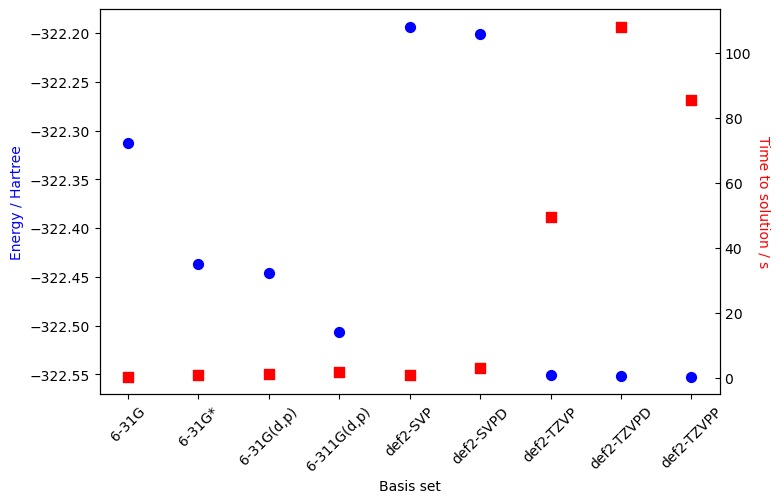

Temps d'exécution : 0.40 secondes


In [44]:
import matplotlib.pyplot as plt

# Create the matplotlib figure
fig, ax = plt.subplots(figsize=(8,5))

# Plot the energies.
ax.set_xticks(range(len(basis_sets)), basis_sets, rotation=45)
ax.set_xlabel("Basis set")
ax.set_ylabel("Energy / Hartree", color="b")
ax.scatter(range(len(basis_sets)), mf_energies, marker="o", s=50, color="b")

# Plot the time to solution
ax_time = ax.twinx()
ax_time.scatter(range(len(basis_sets)), mf_times, marker="s", s=50, color="r")
ax_time.set_ylabel("Time to solution / s", color="r", rotation=270, va="bottom")

# Show the graph
plt.tick_params(axis="both", direction="in")
plt.show()

In [45]:
print(f'Le nombre total d\'électrons est {mol_pyscf.nelectron} et le nombre total d\'électrons (alpha, béta) est {mol_pyscf.nelec}')
print(f'Le nombre d\'orbitales atomiques, dans la base {mol_pyscf.basis}, est {mol_pyscf.nao_nr()}')
print(f'L\'énergie nucléaire vaut {mol_pyscf.energy_nuc()} Hartrees')

Le nombre total d'électrons est 54 et le nombre total d'électrons (alpha, béta) est (27, 27)
Le nombre d'orbitales atomiques, dans la base def2-TZVPP, est 318
L'énergie nucléaire vaut 301.87493059384036 Hartrees
Temps d'exécution : 0.00 secondes


## Calculons l'energie Hartree-Fock (HF)

In [46]:
from pyscf import scf

Temps d'exécution : 0.00 secondes


In [47]:
import time
start_hf = time.time()
myhf = scf.RHF(mol_pyscf).run()
hf_energy = myhf.e_tot
hf_time = time.time() - start_hf

print("Énergie totale HF :", hf_energy)
print("Temps de calcul HF :", hf_time, "secondes")


converged SCF energy = -322.552447471276
Énergie totale HF : -322.55244747127557
Temps de calcul HF : 84.58392643928528 secondes
Temps d'exécution : 84.58 secondes


In [48]:
myhf.mo_occ #- Occupation MO (vecteur de longueur égale au nombre de MO)

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

Temps d'exécution : 0.01 secondes


In [49]:
lumo_idx = myhf.mo_occ.tolist().index(0.)
homo_idx = lumo_idx - 1
print(f'Les indexes du (HOMO,LUMO) sont {homo_idx,lumo_idx}')

Les indexes du (HOMO,LUMO) sont (26, 27)
Temps d'exécution : 0.00 secondes


##   Calcul DFT

In [50]:
from pyscf import dft

Temps d'exécution : 0.00 secondes


In [51]:
myks = dft.RKS(mol_pyscf, xc="B3LYP").run()

print("Énergie totale DFT :", myks.e_tot)

/home/marshall/anaconda3/lib/python3.11/site-packages/pyscf/dft/libxc.py:507: UserWarning: Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, corresponding to the original definition by Stephens et al. (issue 1480) and the same as the B3LYP functional in Gaussian. To restore the VWN5 definition, you can put the setting "B3LYP_WITH_VWN5 = True" in pyscf_conf.py
  warnings.warn('Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, '


converged SCF energy = -324.616304196582
Énergie totale DFT : -324.61630419658223
Temps d'exécution : 101.59 secondes
